# Loading libraries and customising settings

In [1]:
# Activate reload of libraries if changes are made (optional)
%load_ext autoreload
%autoreload

# To filter annying warnings
import warnings
warnings.filterwarnings(action='ignore')

from os import listdir, walk
from os.path import join

import pandas as pd
# Changing visualisation options of pandas.
list_options = [['display.max_columns', None],
                ['display.width', None],
                ['display.max_colwidth', None],
                ['display.precision', 3],
                ['display.min_rows', None],
                ['display.max_rows', 50],
               ]
for param, value in list_options:
    pd.set_option(param, value)
import numpy as np
from sklearn.preprocessing import (MinMaxScaler,
                                   StandardScaler,
                                  )
from sklearn.metrics import adjusted_mutual_info_score as AMI
from scipy.stats import skew, kurtosis
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib.patheffects import Stroke
mpl.rcParams['svg.fonttype'] = 'none'
# import colorsys
import joblib
# import dtw
import networkx as nx
# import colorsys as cs
# from more_itertools import roundrobin

# Library to perform the analysis (included in the repository)
import BespokenTools as bt

Failed to read module file 'C:\Users\v95983rc\AppData\Local\anaconda3\envs\mlVAR_DRC\Lib\functools.py' for module 'functools': UnicodeDecodeError
Traceback (most recent call last):
  File "C:\Users\v95983rc\AppData\Local\anaconda3\envs\mlVAR_DRC\Lib\site-packages\IPython\core\extensions.py", line 62, in load_extension
    return self._load_extension(module_str)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\v95983rc\AppData\Local\anaconda3\envs\mlVAR_DRC\Lib\site-packages\IPython\core\extensions.py", line 77, in _load_extension
    mod = import_module(module_str)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\v95983rc\AppData\Local\anaconda3\envs\mlVAR_DRC\Lib\importlib\__init__.py", line 90, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1387, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1360, in _find_and_loa

## CMaps settings

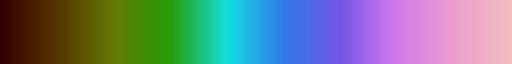

In [2]:
spectrumHSL=bt.SpectrumHSL(sat_range=[1.0,0.67],
                           lig_range=[0.1,0.85],
                          )
display(spectrumHSL)

# Characterisation of the whole dataset

In [3]:
### This takes the unimmputted data and dismisses the "invalid" participants
in_folder = r'.'
in_file = 'Data.csv'

constructs_data = pd.read_csv(join(in_folder,
                                   in_file,
                                  ),
                              parse_dates=[2],
                             )

In [4]:
constructs = sorted(constructs_data.columns[4:])
colors = [spectrumHSL(i/len(constructs))
          for i, n
          in enumerate(constructs)
         ]

node_color = {(k
              ):v
              for k,v
              in zip(constructs, colors)
             }

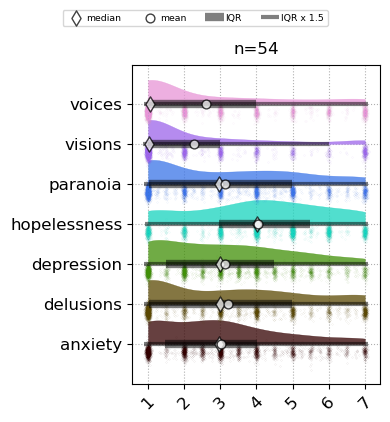

In [5]:
out_folder = r'.'

head_columns =['encounter_date',
               'dataset',
               'participant_id',
               'day_n',
              ]

constructs = sorted(constructs_data
                    .columns[4:]
                   )
node_color = bt.NodeColours(constructs,
                            spectrumHSL,
                           )

fig, axes = plt.subplots(nrows=1,
                         ncols=1,
                         figsize=[4,4],
                        )
df_plot = (constructs_data
           .copy(deep=True)
          )
df_plot.sort_index(axis=1, inplace=True)
n_participants = len(set(df_plot
                         .participant_id
                        )
                    )
df_plot.drop(head_columns,
             axis=1,
             inplace=True,
            )
df_plot.rename(columns={c:c
                        for c
                        in df_plot.columns
                       },
               inplace=True,
              )
ax = axes
bt.RainViolin(df_plot,
          ax,
          node_color,
          f'n={n_participants}',
         )

fig.legend(*ax.get_legend_handles_labels(),
           bbox_to_anchor=[0.5,
                           1.055,
                          ],
           bbox_transform=fig.transFigure,
           ncols=4,
           loc='upper center',
           labelspacing=0.3,
           handletextpad=0.15,
           fontsize=6.75,
          )
fig.tight_layout(h_pad=0.0,
                 w_pad=0.0,
                )
# filename = 'AllDataSummary_RaincloudPlot.png'
# plt.savefig(filename,
#             bbox_inches='tight',
#             dpi=300,
#            )

plt.show();

## Summary dataframe

In [6]:
table = (df_plot
         .reindex(sorted(df_plot
                         .columns,
                         reverse=True,
                        ),
                  axis=1,
                 )
         .agg(['count',
               'median',
               'mean',
               'std',
               'skew',
               'kurtosis',
              ]
             )
         .T
         .style
         .format(precision=2,
                 thousands=',',
                )
         .background_gradient(cmap='RdYlGn_r',
                              subset=['mean',
                                      'median',
                                     ],
                             )
         .background_gradient(cmap='coolwarm_r',
                              subset=['count',
                                      'kurtosis',
                                     ],
                             )
         .background_gradient(cmap='coolwarm',
                              subset=['std',
                                      'skew',
                                     ],
                             )
        )
display(table)
# table.to_html('AllDataSummary_Table_2ndMcript.html')

,count,median,mean,std,skew,kurtosis
voices,"4,467.00",1.07,2.60,2.08,1.01,-0.41
visions,"4,467.00",1.04,2.28,1.93,1.42,0.73
paranoia,"4,467.00",2.98,3.12,2.04,0.48,-1.08
hopelessness,"4,467.00",4.01,4.05,1.86,-0.12,-0.97
depression,"4,467.00",2.99,3.13,1.80,0.48,-0.81
delusions,"4,467.00",3.00,3.22,2.11,0.46,-1.10
anxiety,"4,467.00",2.98,3.02,1.75,0.65,-0.45


# 2nd Manuscript

## mlVAR - Original constructs

## Uploading data & converting to Nx graphs

In [7]:
in_folder = r'.'
network_files={}
g_types = ['temporal',
           'between',
           'contemporaneous',
          ]
for g_type in g_types:
    files = [file
             for file
             in listdir(in_folder)
             if g_type in file
             if 'cluster' in file
             if file.endswith('.csv')
            ]
    network_files[g_type] = files
display(network_files)

{'temporal': ['mlvar_cluster0_temporal.csv',
  'mlvar_cluster1_temporal.csv',
  'mlvar_cluster2_temporal.csv',
  'mlvar_cluster3_temporal.csv'],
 'between': ['mlvar_cluster0_between.csv',
  'mlvar_cluster1_between.csv',
  'mlvar_cluster2_between.csv',
  'mlvar_cluster3_between.csv'],
 'contemporaneous': ['mlvar_cluster0_contemporaneous.csv',
  'mlvar_cluster1_contemporaneous.csv',
  'mlvar_cluster2_contemporaneous.csv',
  'mlvar_cluster3_contemporaneous.csv']}

In [8]:
dict_mlvar = {}
new_columns = ['n0',
               'n1',
               'similarity',
              ]

for g_type, files in network_files.items():
    networks = {}
    for file in files:
        cluster = file.split('_')[1][-1:]
        df = pd.read_csv(file)
        columns = df.columns
        df_mlvar = pd.DataFrame(columns=new_columns)
        if columns[0]=='v1':
            df_mlvar = pd.DataFrame(columns=new_columns,
                                  data=(df
                                        .iloc[:,[0,1,4]]
                                        .values
                                       ),
                                 )
        else:
            df_mlvar = pd.DataFrame(columns=new_columns,
                                  data=(df
                                        .iloc[:,[0,1,3]]
                                        .values
                                       ),
                                 )
        constructs = sorted(df_mlvar
                            .iloc[:,:2]
                            .stack()
                            .value_counts()
                            .keys()
                           )
        constructs_combinations = df_mlvar.values    
        edges = {(c0,c1):float(v)
                 for c0,c1, v
                 in constructs_combinations
                }
    
        nodes = {q:{}
                 for i, q 
                 in enumerate(constructs)
                }    
        edges = {k:{'similarity':v,
                    'absolute_similarity': abs(v),
                   }
                 for k,v
                 in edges.items()
                }
        directional = True if g_type=='temporal' else False
        g = bt.GraphBuilding(nodes,
                             edges,
                             'absolute_similarity',
                             directional=directional,
                            )
        networks[cluster] = g
    dict_mlvar[g_type] = networks

display(dict_mlvar)

{'temporal': {'0': <networkx.classes.digraph.DiGraph at 0x1c9e19168a0>,
  '1': <networkx.classes.digraph.DiGraph at 0x1c9e02270b0>,
  '2': <networkx.classes.digraph.DiGraph at 0x1c9e089a810>,
  '3': <networkx.classes.digraph.DiGraph at 0x1c9e0224830>},
 'between': {'0': <networkx.classes.graph.Graph at 0x1c9e1916540>,
  '1': <networkx.classes.graph.Graph at 0x1c9e0317620>,
  '2': <networkx.classes.graph.Graph at 0x1c9e0225970>,
  '3': <networkx.classes.graph.Graph at 0x1c9e0292ba0>},
 'contemporaneous': {'0': <networkx.classes.graph.Graph at 0x1c9e039b800>,
  '1': <networkx.classes.graph.Graph at 0x1c9e0898620>,
  '2': <networkx.classes.graph.Graph at 0x1c9e072af60>,
  '3': <networkx.classes.graph.Graph at 0x1c9e0270680>}}

# (*) Plotting

## Clusters' characterisation

In [11]:
byclusters_data = pd.read_csv('BRC_data+clusters.csv')
byclusters_data.head()

,dataset,participant_id,encounter_date,day_n,cluster,hopelessness,depression,voices,visions,anxiety,paranoia,delusions
0,clintouch,10142,2018-08-09,1,2,4.5,2.250,1.5,1.000,2.250,1.750,1.0
1,clintouch,10142,2018-08-10,2,2,7.0,2.000,1.0,1.000,3.000,2.250,1.0
2,clintouch,10142,2018-08-11,3,2,7.0,3.000,1.0,1.000,2.000,5.500,1.0
3,clintouch,10142,2018-08-12,4,2,7.0,2.000,1.0,1.000,1.000,1.750,1.5
4,clintouch,10142,2018-08-13,5,2,7.0,2.000,1.0,1.000,1.000,1.500,1.5
5,clintouch,10142,2018-08-14,6,2,7.0,4.750,1.0,1.000,1.500,2.000,1.5
6,clintouch,10142,2018-08-16,8,2,5.0,4.000,1.0,1.000,1.500,2.000,3.0
7,clintouch,10142,2018-08-17,9,2,7.0,2.750,1.0,1.000,1.500,2.250,5.5
8,clintouch,10142,2018-08-18,10,2,6.0,2.000,1.0,1.000,1.000,1.500,5.0
9,clintouch,10142,2018-08-19,11,2,7.0,1.000,1.0,1.000,1.000,1.500,5.0


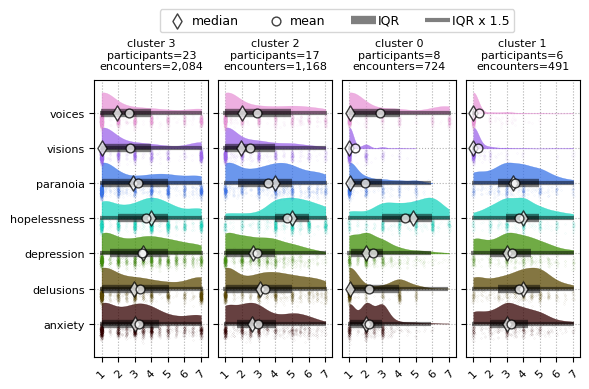

In [14]:
head_columns =['encounter_date',
               'dataset',
               'participant_id',
               'day_n',
               'cluster',
              ]
fs = 8
constructs = sorted(byclusters_data
                    .columns[5:]
                   )
node_color = bt.NodeColours(constructs,
                         spectrumHSL,
                        )
clusters = byclusters_data['cluster'].value_counts().index
mosaic = bt.MosaicPlots(clusters)
width_ratios = ([1.0,0.0025]
                * len(clusters)
               )[:-1]
len_cls = len(clusters)
fig, axes = plt.subplot_mosaic(mosaic=mosaic,
                               sharey=True,
                               figsize=(len_cls*1.5, 4),
                               width_ratios=width_ratios,
                               height_ratios=[0.0,1.0],
                              )

df_sumstats_cluster = pd.DataFrame()
for i, (cluster, df_plot) in enumerate(byclusters_data
                                       .groupby('cluster')
                                      ):
    df_plot.sort_index(axis=1,
                       inplace=True,
                      )
    n_participants = len(set(df_plot
                             .participant_id
                            )
                        )
    df_plot.drop(head_columns,
                 axis=1,
                 inplace=True,
                )
    ax = axes[str(cluster)]
    bt.RainViolin(df_plot,
                  ax,
                  node_color,
                  (f'cluster {cluster}\n'
                   f'participants={n_participants}\n'
                   f'encounters={df_plot.shape[0]:,}'
                  ),
                  fs,
              )
axes['A'].axis('off')
axes['A'].legend(*ax.get_legend_handles_labels(),
                 bbox_to_anchor=[0.5,
                                 1.0,
                                ],
                 bbox_transform=axes['A'].transAxes,
                 ncols=len(ax.get_legend_handles_labels()[1]),
                 loc='lower center',
                 labelspacing=0.3,
                 handletextpad=0.15,
                 fontsize=fs*1.125,
                )
fig.tight_layout(h_pad=0.0,
                 w_pad=0.0,
                )
# filename = 'ByClustersSummary_RaincloudPlot_2ndMcript.png'
# plt.savefig(filename,
#             bbox_inches='tight',
#             dpi=300,
#            )
plt.show();

DiGraph with 7 nodes and 49 edges
DiGraph with 7 nodes and 49 edges
DiGraph with 7 nodes and 49 edges
DiGraph with 7 nodes and 49 edges
Graph with 7 nodes and 21 edges
Graph with 7 nodes and 21 edges
Graph with 7 nodes and 21 edges
Graph with 7 nodes and 21 edges
Graph with 7 nodes and 21 edges
Graph with 7 nodes and 21 edges
Graph with 7 nodes and 21 edges
Graph with 7 nodes and 21 edges


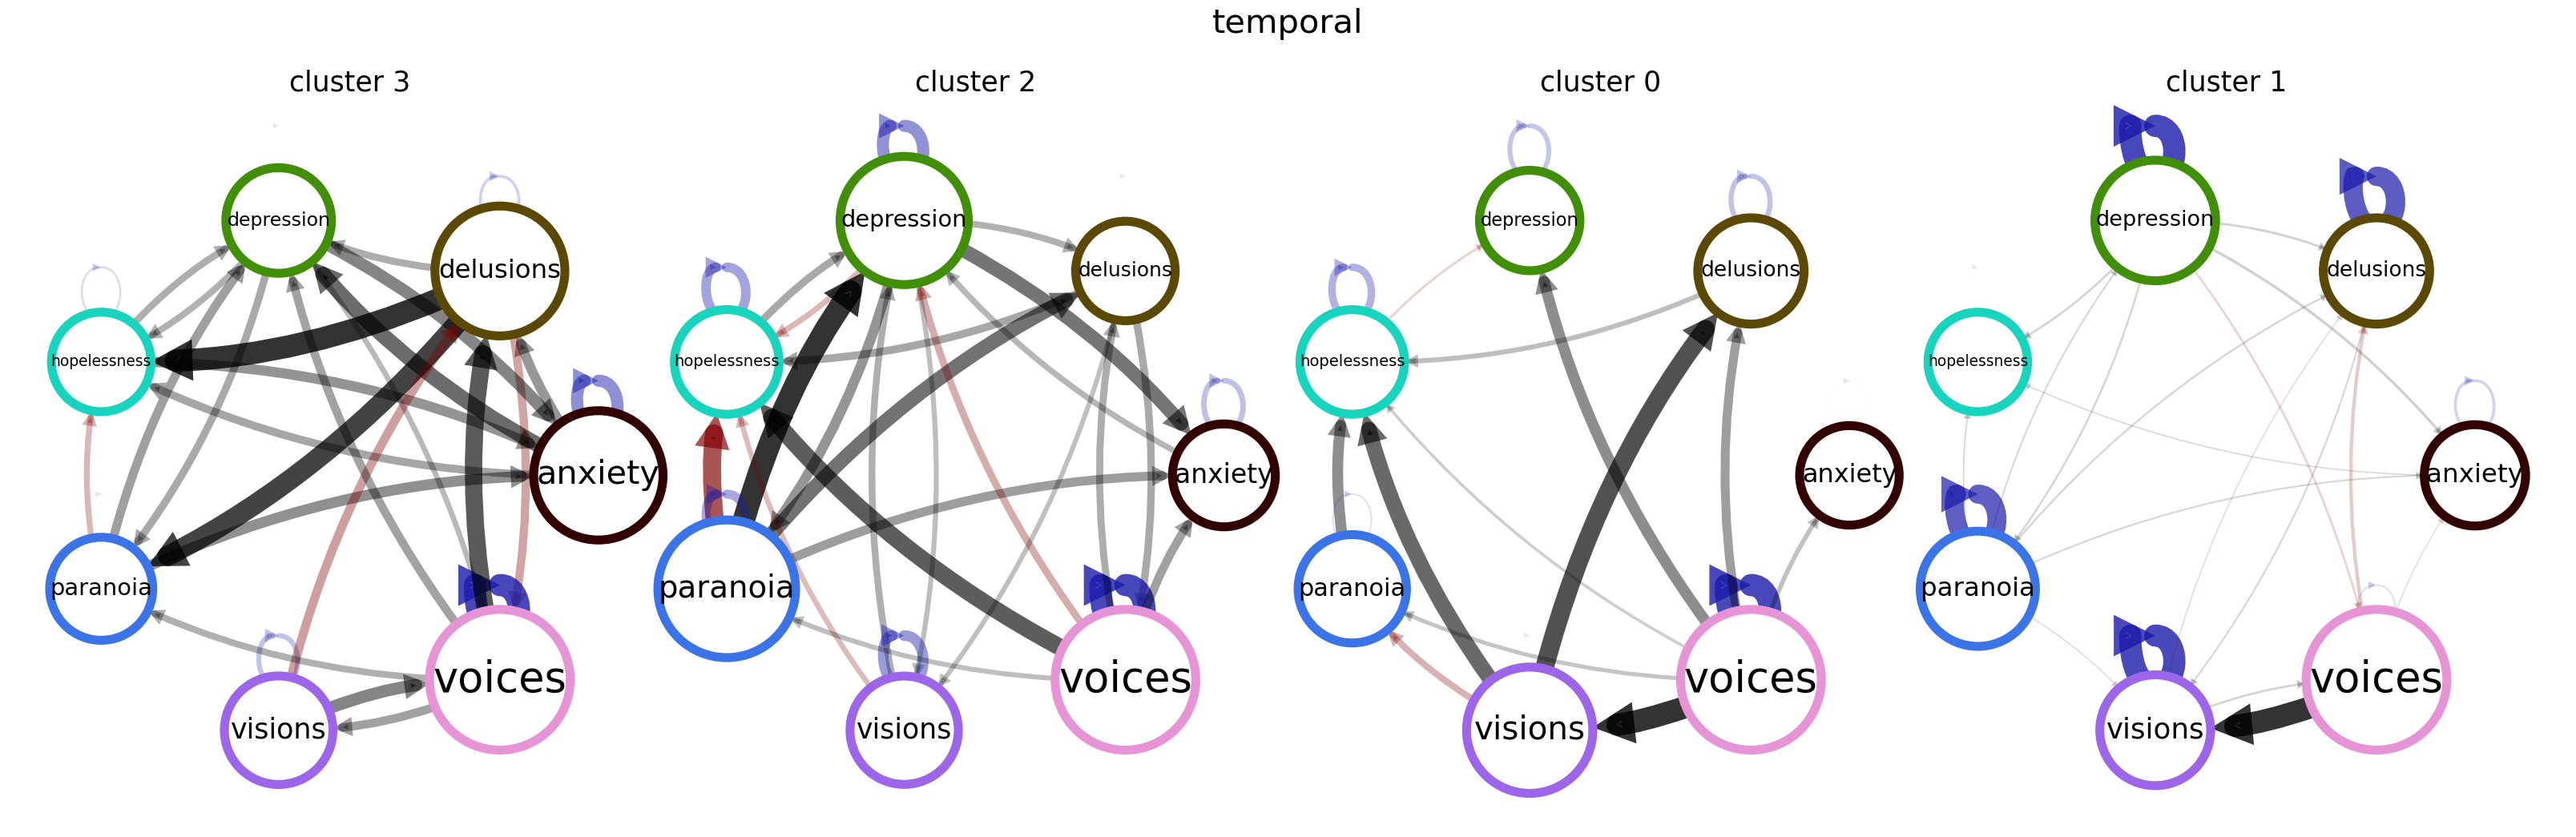

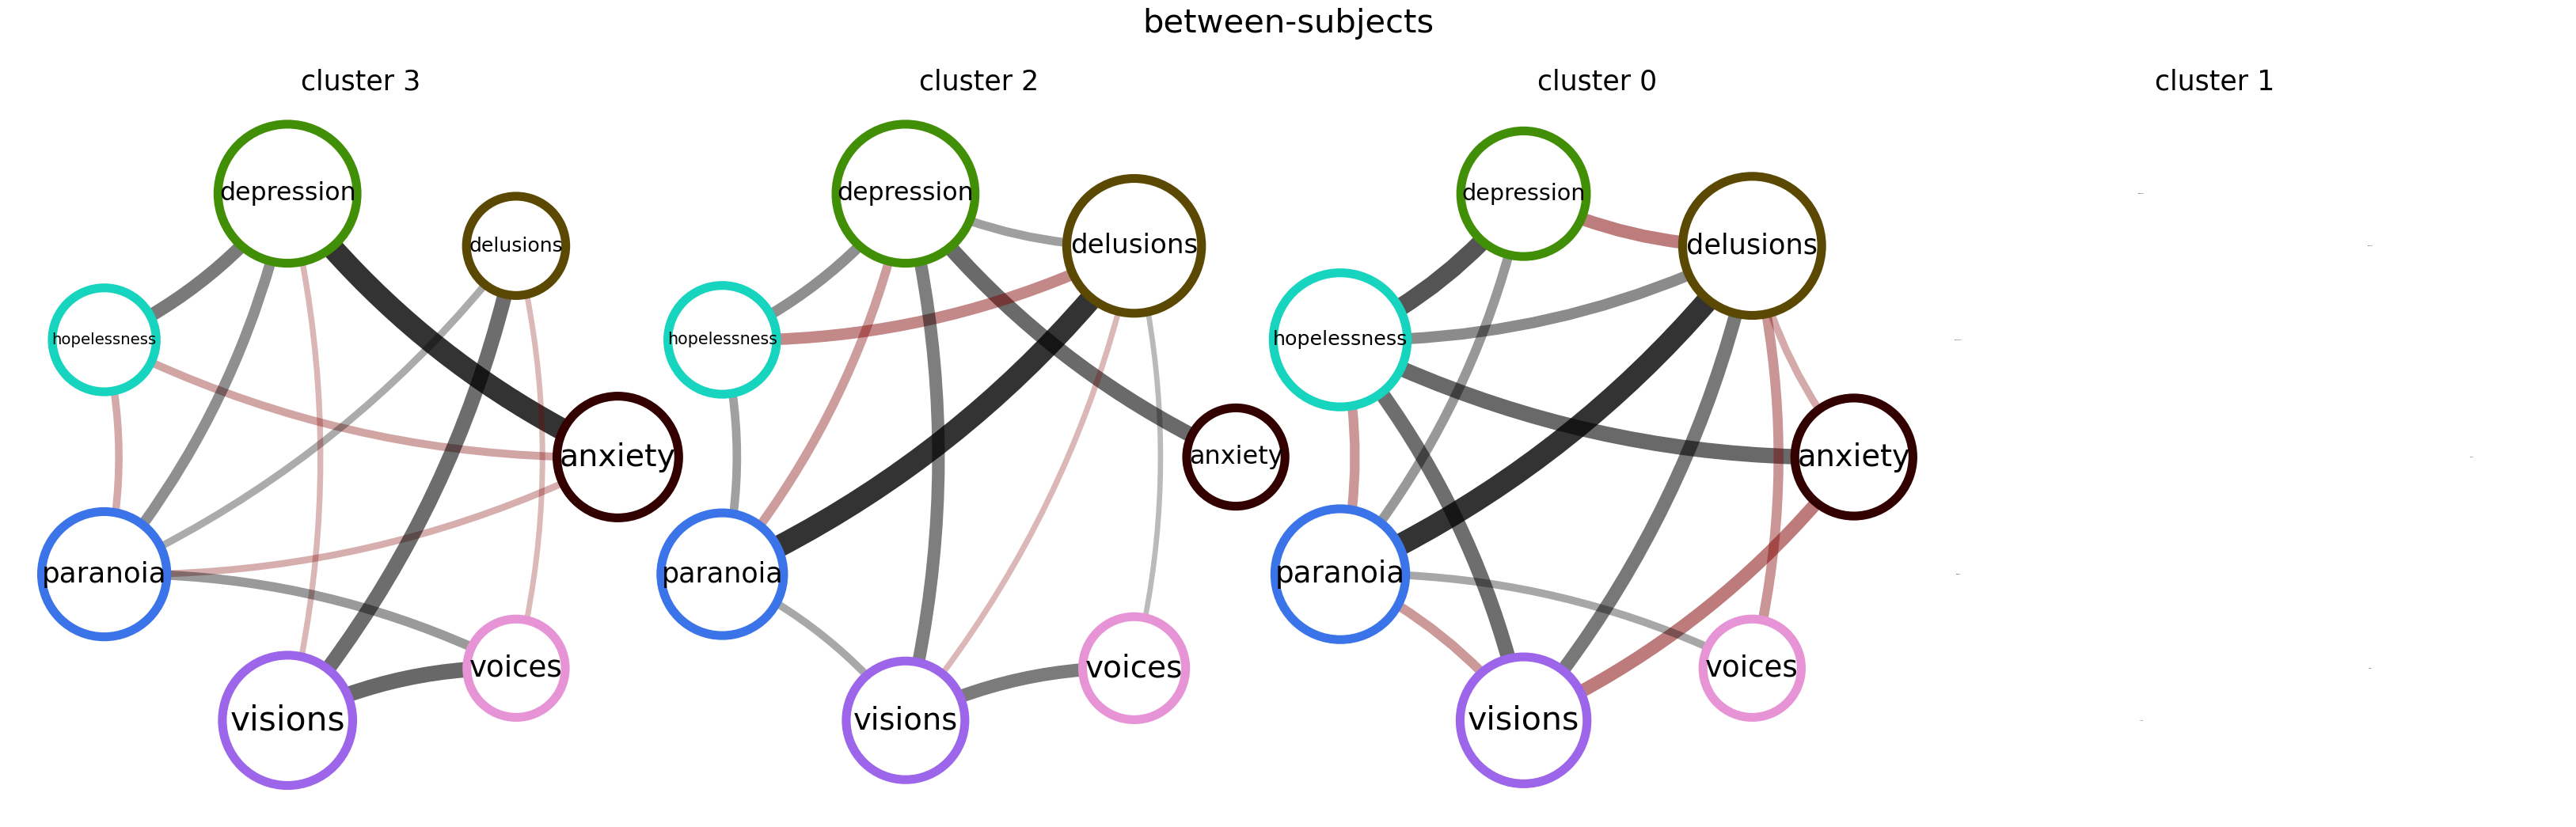

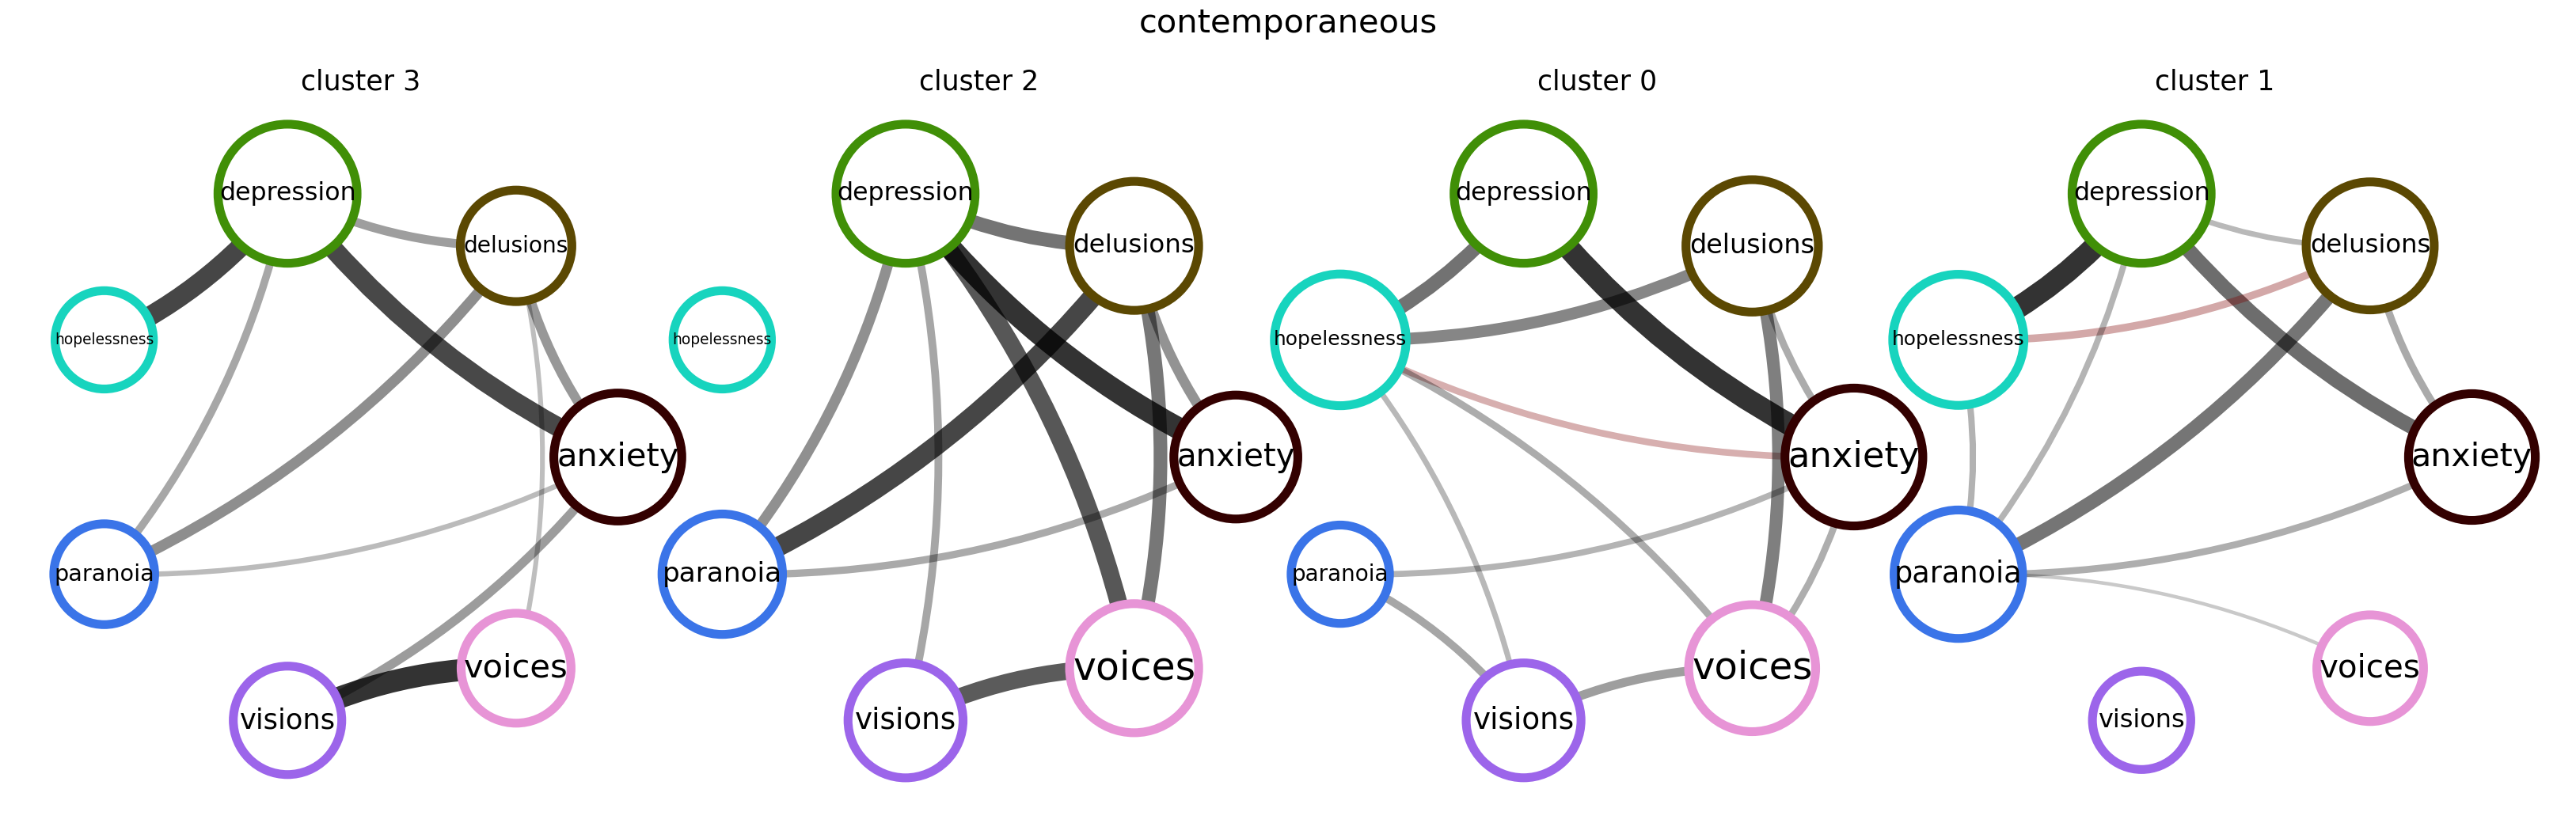

In [15]:

for g_type, dict_graphs in dict_mlvar.items():
    if True:
        clusters = byclusters_data['cluster'].value_counts().index
        mosaic = ''.join(clusters.astype(str).tolist())#bt.MosaicNetworks(clusters)
        len_gl =  len(dict_graphs)
        rows = 1
        fig, axes = plt.subplot_mosaic(mosaic,
                                       figsize=(35,10*rows),
                                      )
        for cluster in clusters:
            g = dict_graphs[str(cluster)]
            for k, v in {'_':'\n',
                        }.items():
                g = bt.ModifyNodesNames(g,
                                     k,
                                     v,
                                    )
            n = len(set(byclusters_data
                        .query('cluster==@cluster')
                        ['participant_id']
                       )
                   )
            title = f'cluster {cluster}'
            bt.GraphPlot(g,
                         g_type,
                         title,
                         axes,
                         str(cluster),
                         spectrumHSL,
                        )
        fig.suptitle((g_type
                      if g_type!='between'
                      else g_type+'-subjects'
                     ),
                     x=0.5,
                     y=1.0,
                     fontsize=30,
                     ha='center',
                     va='bottom',
                     transform=fig.transFigure,
                    )
        fig.tight_layout(h_pad=-5,
                         w_pad=-25,
                        )
        # filename = f'{g_type}_byclusters_graphs.png'
        # plt.savefig(filename,
        #             bbox_inches='tight',
        #             dpi=300,
        #            )
        plt.show();

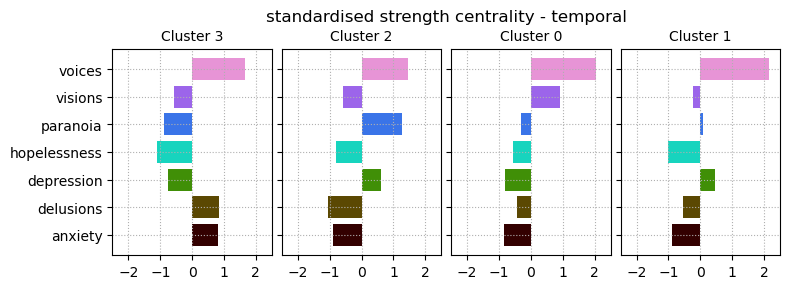

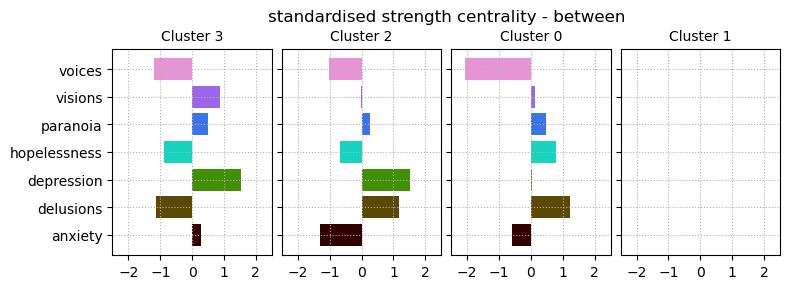

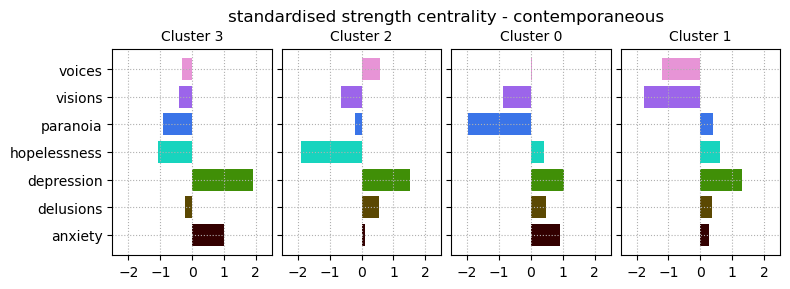

In [17]:
for g_type, graphsbyclusters in dict_mlvar.items():
    clusters = byclusters_data['cluster'].value_counts().index
    mosaic = bt.MosaicPlots(clusters)
    len_gl =  len(graphsbyclusters)
    width_ratios = ([1.0,0.0025] * len_gl)[:-1]
    fig, axes = plt.subplot_mosaic(mosaic=mosaic,
                                   # sharex=True,
                                   sharey=True,
                                   figsize=(len_gl*2,3),
                                   width_ratios=width_ratios,
                                   height_ratios=[0.0,1.0],
                                  )
    j=0
    for cluster in clusters:
        cluster = str(cluster)
        g = graphsbyclusters[cluster]
        for k, v in {'_':'\n',
                    }.items():
            g = bt.ModifyNodesNames(g,
                                 k,
                                 v,
                                )
        df = pd.DataFrame(dict(g
                               .nodes
                               .data(True)
                              )
                         )
        df.drop(['betweenness',
                 'closeness',
                ],
                axis=0,
                inplace=True,
               )

        df_plot = df.T
        colors = [spectrumHSL(i/len(list(g)))
                      for i, n
                      in enumerate(list(g))
                     ]
        ax = axes[cluster]
        ax.barh([(label_
                  .replace('\n',' ')
                 )
                 for label_
                 in df_plot.index
                ],
                bt.StandardNorm(df_plot
                           .values,
                          ),
                color=colors,
               )
        ax.grid(linestyle=':', zorder=0)
        ax.set_title(f'Cluster {cluster}',
                     fontsize=10,
                    )
        ax.set_xticks(np.linspace(-3,3,7))
        ax.set_xlim(-2.5,2.5)
        ax.tick_params(axis='x',
                       labelsize=10,
                      )
    axes['A'].axis('off')
    axes['A'].set_title(('standardised strength centrality '
                        f'- {g_type}'),
                        fontsize=12,
                       )

    fig.tight_layout(h_pad=0.0,
                 w_pad=0.0,
                )
    # filename = f'{g_type}_bycluster_strength.png'
    # plt.savefig(filename,
    #             bbox_inches='tight',
    #             dpi=300,
    #            )
    plt.show();